In [178]:
import scqubits as scq
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

### Set up for a general transmon-transmon coupler circuit

In [135]:
tmon_coupler_yaml = """ 
branches:
- [JJ, 0, 1, EJ = 10, ECJ = 1]
- [JJ, 2, 0, EJ, ECJ]
- [C, 1, 2, EC = 1]
"""

Node matrix is $\begin{pmatrix} 1 & 0 \\  0 & 1\end{pmatrix}$; alternative matrix is $\begin{pmatrix} 1 & 1 \\  0 & 1\end{pmatrix}$

In [137]:
# Circuit instance that calculates the exact transmon coupler eigenenergies with two different transformation matrices
tmon_coupler_node_exact = scq.Circuit(tmon_coupler_yaml, from_file=False)
tmon_coupler_node_exact.configure(transformation_matrix=np.identity(2))
tmon_coupler_alternative_exact = scq.Circuit(tmon_coupler_yaml, from_file=False)
tmon_coupler_alternative_exact.configure(transformation_matrix=np.array([[1,1],[0,1]]))
# Circuit instance that calculates the coupler eigenenergies with node variables and HD
tmon_coupler_node_HD = scq.Circuit(tmon_coupler_yaml, from_file=False)
tmon_coupler_node_HD.configure(transformation_matrix=np.identity(2))
# Circuit instance that calculates the coupler eigenenergies with the alternative variables and HD
tmon_coupler_alternative_HD = scq.Circuit(tmon_coupler_yaml, from_file=False)
tmon_coupler_alternative_HD.configure(transformation_matrix=np.array([[1,1],[0,1]]))

In [138]:
tmon_coupler_node_exact.sym_hamiltonian()

<IPython.core.display.Latex object>

In [139]:
tmon_coupler_alternative_exact.sym_hamiltonian()

<IPython.core.display.Latex object>

### Set up cutoffs for the numerically exact results without HD; convergence test
TL;DR: 30 cutoff for each variable for our parameter range is sufficient (and the runtime is bearable)

In [143]:
# set up cutoffs for the numerically exact values; 30 is a very fat cutoff
tmon_coupler_node_exact.cutoff_n_1 = 30
tmon_coupler_node_exact.cutoff_n_2 = 30
tmon_coupler_alternative_exact.cutoff_n_1 = 30
tmon_coupler_alternative_exact.cutoff_n_2 = 30

In [144]:
eigvals_tmon_coupler_node_exact, eigvecs_tmon_coupler_node_exact = tmon_coupler_node_exact.eigensys()
eigvals_tmon_coupler_alternative_exact, eigvecs_tmon_coupler_alternative_exact = tmon_coupler_alternative_exact.eigensys()

In [145]:
# larger cutoff 
tmon_coupler_node_exact.cutoff_n_1 = 50
tmon_coupler_node_exact.cutoff_n_2 = 50
tmon_coupler_alternative_exact.cutoff_n_1 = 50
tmon_coupler_alternative_exact.cutoff_n_2 = 50

In [146]:
eigvals_tmon_coupler_node_exact_50_cutoff, eigvecs_tmon_coupler_node_exact_50_cutoff = tmon_coupler_node_exact.eigensys()
eigvals_tmon_coupler_alternative_exact_50_cutoff, eigvecs_tmon_coupler_alternative_exact_50_cutoff = tmon_coupler_alternative_exact.eigensys()

In [147]:
# test convergence
eigvals_tmon_coupler_node_exact_50_cutoff - eigvals_tmon_coupler_node_exact

array([ 3.92574862e-13, -2.60591548e-12, -1.34292577e-12, -2.28261854e-13,
        8.23563440e-13,  1.29868338e-13])

In [149]:
# original energy differences are much larger between energy levels
eigvals_tmon_coupler_node_exact_50_cutoff

array([-13.27286994,  -8.60747003,  -5.2078074 ,  -4.26039448,
        -1.44438037,   0.1588155 ])

In [148]:
# convergence is also verified for the alternative set of transformation matrix
eigvals_tmon_coupler_alternative_exact_50_cutoff - eigvals_tmon_coupler_alternative_exact

array([-1.39799283e-12, -2.11208828e-12, -4.68070027e-13, -8.79296636e-13,
        2.89768209e-13,  1.06945008e-12])

In [150]:
# also test for other parameters (we test EC = 0.01 and EC = 100 cases)
# first test EC = 0.01 case
tmon_coupler_node_exact.EC = 0.01
tmon_coupler_alternative_exact.EC = 0.01
tmon_coupler_node_exact.cutoff_n_1 = 30
tmon_coupler_node_exact.cutoff_n_2 = 30
tmon_coupler_alternative_exact.cutoff_n_1 = 30
tmon_coupler_alternative_exact.cutoff_n_2 = 30
eigvals_tmon_coupler_node_exact, _ = tmon_coupler_node_exact.eigensys()
eigvals_tmon_coupler_alternative_exact, _ = tmon_coupler_alternative_exact.eigensys()
tmon_coupler_node_exact.cutoff_n_1 = 50
tmon_coupler_node_exact.cutoff_n_2 = 50
tmon_coupler_alternative_exact.cutoff_n_1 = 50
tmon_coupler_alternative_exact.cutoff_n_2 = 50
eigvals_tmon_coupler_node_exact_50_cutoff, _ = tmon_coupler_node_exact.eigensys()
eigvals_tmon_coupler_alternative_exact_50_cutoff, _ = tmon_coupler_alternative_exact.eigensys()

In [151]:
# show values 
eigvals_tmon_coupler_node_exact 

array([-15.36016636, -14.76860575, -14.18005812, -13.59456174,
       -13.01215709, -12.43288709])

In [152]:
# show differences
eigvals_tmon_coupler_node_exact_50_cutoff - eigvals_tmon_coupler_node_exact

array([-9.05409081e-12, -1.56425983e-11, -1.47331036e-11, -8.31157365e-12,
       -1.23492327e-11, -3.23829852e-12])

In [153]:
eigvals_tmon_coupler_alternative_exact_50_cutoff - eigvals_tmon_coupler_alternative_exact

array([-1.08180132e-12, -2.60769184e-12, -4.29345448e-12, -3.24895666e-12,
       -3.54738461e-12, -2.00905959e-12])

In [154]:
# repeat for EC = 100 case
tmon_coupler_node_exact.EC = 100
tmon_coupler_alternative_exact.EC = 100
tmon_coupler_node_exact.cutoff_n_1 = 30
tmon_coupler_node_exact.cutoff_n_2 = 30
tmon_coupler_alternative_exact.cutoff_n_1 = 30
tmon_coupler_alternative_exact.cutoff_n_2 = 30
eigvals_tmon_coupler_node_exact, _ = tmon_coupler_node_exact.eigensys()
eigvals_tmon_coupler_alternative_exact, _ = tmon_coupler_alternative_exact.eigensys()
tmon_coupler_node_exact.cutoff_n_1 = 50
tmon_coupler_node_exact.cutoff_n_2 = 50
tmon_coupler_alternative_exact.cutoff_n_1 = 50
tmon_coupler_alternative_exact.cutoff_n_2 = 50
eigvals_tmon_coupler_node_exact_50_cutoff, _ = tmon_coupler_node_exact.eigensys()
eigvals_tmon_coupler_alternative_exact_50_cutoff, _ = tmon_coupler_alternative_exact.eigensys()

In [155]:
# show values 
eigvals_tmon_coupler_node_exact 

array([-11.63823801,  -3.81277562,  -3.7369319 ,   1.58031424,
         1.5823833 ,   4.09046075])

In [156]:
# show differences
eigvals_tmon_coupler_node_exact_50_cutoff - eigvals_tmon_coupler_node_exact

array([-2.25597319e-13,  1.55431223e-13, -3.42836870e-13,  3.70370401e-13,
       -1.33670852e-13,  1.66089364e-13])

In [157]:
eigvals_tmon_coupler_alternative_exact_50_cutoff - eigvals_tmon_coupler_alternative_exact

array([2.16715534e-13, 1.04405373e-12, 2.96651592e-13, 1.29962707e-12,
       1.28053124e-12, 9.55679980e-13])

### Setup for HD

In [171]:
# separation of subsystems; will show later that truncation dimension set to 10 is adequate
truncation_dim = 20
tmon_coupler_node_HD.cutoff_n_1 = 30
tmon_coupler_node_HD.cutoff_n_2 = 30
tmon_coupler_alternative_HD.cutoff_n_1 = 30
tmon_coupler_alternative_HD.cutoff_n_2 = 30
tmon_coupler_node_HD.configure(system_hierarchy=[[1],[2]], subsystem_trunc_dims=[truncation_dim, truncation_dim])
tmon_coupler_alternative_HD.configure(system_hierarchy=[[1],[2]], subsystem_trunc_dims=[truncation_dim, truncation_dim])

### EC values

In [160]:
EC_values = [0.01, 0.05, 0.1, 0.2, 0.5, 1, 5, 10, 20, 50, 100]

### For each EC value, test convergence, and plot EC against partial trace purity, diagonal elements the reduced purity etc.

In [167]:
# restore the exact instance cutoffs to 30
tmon_coupler_node_exact.cutoff_n_1 = 30
tmon_coupler_node_exact.cutoff_n_2 = 30
tmon_coupler_alternative_exact.cutoff_n_1 = 30
tmon_coupler_alternative_exact.cutoff_n_2 = 30

In [180]:
eigval_error_max_node = []
eigval_error_max_alternative = []
ptrace_purity_node_list = []
ptrace_purity_alternative_list = []
ptrace_diagonal_node_subsystem_0 = []
ptrace_diagonal_node_subsystem_1 = []
ptrace_diagonal_alternative_subsystem_0 = [] 
ptrace_diagonal_alternative_subsystem_1 = [] 
for EC in EC_values:
    # set EC values
    tmon_coupler_node_exact.EC = EC
    tmon_coupler_node_HD.EC = EC
    tmon_coupler_alternative_exact.EC = EC
    tmon_coupler_alternative_HD.EC = EC
    # calculate eigenvalues
    eigvals_tmon_coupler_node_exact, _ = tmon_coupler_node_exact.eigensys()
    eigvals_tmon_coupler_alternative_exact, _ = tmon_coupler_alternative_exact.eigensys()
    eigvals_tmon_coupler_node_HD, _ = tmon_coupler_node_HD.eigensys()
    eigvals_tmon_coupler_alternative_HD, _ = tmon_coupler_alternative_HD.eigensys()
    # maximum eigenvalue errors
    eigval_error_max_node.append(max(abs(eigvals_tmon_coupler_node_exact - eigvals_tmon_coupler_node_HD)))
    eigval_error_max_alternative.append(max(abs(eigvals_tmon_coupler_alternative_exact - eigvals_tmon_coupler_alternative_HD)))
    # ptrace purity
    ptrace_purity_node_list.append([tmon_coupler_node_HD.ptrace_purity(which=state_id, remaining_subsys=0) for state_id in range(6)])
    ptrace_purity_alternative_list.append([tmon_coupler_alternative_HD.ptrace_purity(which=state_id, remaining_subsys=0) for state_id in range(6)])
    # diagonal of partial traces
    ptrace_diagonal_node_subsystem_0.append([tmon_coupler_node_HD.ptrace(which=state_id, remaining_subsys=0).diag() for state_id in range(6) ])
    ptrace_diagonal_node_subsystem_1.append([tmon_coupler_node_HD.ptrace(which=state_id, remaining_subsys=1).diag() for state_id in range(6) ])
    ptrace_diagonal_alternative_subsystem_0.append([tmon_coupler_alternative_HD.ptrace(which=state_id, remaining_subsys=0).diag() for state_id in range(6) ])
    ptrace_diagonal_alternative_subsystem_1.append([tmon_coupler_alternative_HD.ptrace(which=state_id, remaining_subsys=1).diag() for state_id in range(6) ])


In [186]:
tmon_coupler_alternative_HD.ptrace_purity(which=0,remaining_subsys=0)

0.7150716872789573

In [187]:
tmon_coupler_alternative_HD.eigenvals()

array([-11.63823801,  -3.81277562,  -3.7369319 ,   1.58031424,
         1.5823833 ,   4.09046075])

In [175]:
# inspect max errors in energies
eigval_error_max_node

[0.12972051313202293, 2.8064154484752635e-05, 4.0813246116044866e-09, 1.1324274851176597e-12, 7.549516567451064e-13, 4.711786516509164e-13, 7.966960424710123e-13, 1.1255441023649837e-12, 9.943157408542902e-13]

In [176]:
eigval_error_max_alternative

[0.09481157407095253, 5.807063255858225e-05, 4.287239185885028e-08, 8.22453216642316e-13, 9.78772618509538e-13, 6.075140390748857e-13, 1.3162804179955856e-12, 1.056488230233299e-12, 1.0027534358414414e-12]

In [183]:
# color cycle
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

Text(0, 0.5, 'partial trace purity')

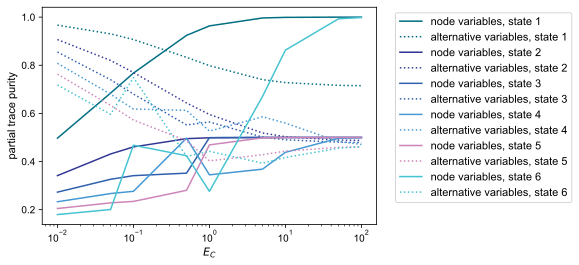

In [226]:
# plot partial trace purities for each EC for each eigenstate
for state_id in range(6):
    plt.semilogx(EC_values, [ptrace_purity_node_list[EC_id][state_id] for EC_id in range(len(EC_values))], linestyle="-", color = color_cycle[state_id], label="node variables, state "+str(state_id+1))
    plt.semilogx(EC_values, [ptrace_purity_alternative_list[EC_id][state_id] for EC_id in range(len(EC_values))], linestyle=":", color = color_cycle[state_id], label="alternative variables, state "+str(state_id+1))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel(r"$E_C$")
plt.ylabel("partial trace purity")

Text(0, 0.5, '$[\\rho_0]_{ii}$')

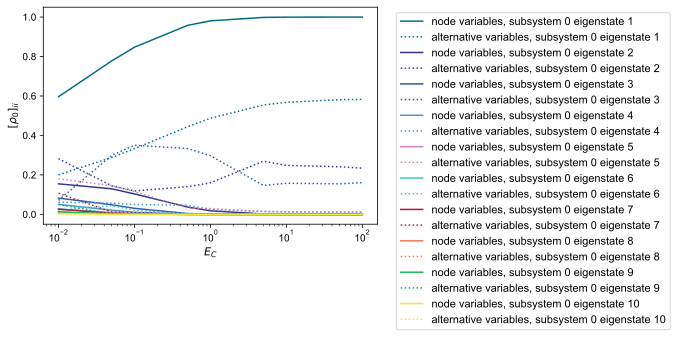

In [242]:
# plot participation of each subsystem eigenstates for ground state
# for subsystem 0, looking for the first 10 states
eigenstate = 0
for state_id in range(10):
    plt.semilogx(EC_values, [ptrace_diagonal_node_subsystem_0[EC_id][eigenstate][state_id] for EC_id in range(len(EC_values))], linestyle="-", color = color_cycle[state_id], label="node variables, subsystem 0 eigenstate "+str(state_id+1))
    plt.semilogx(EC_values, [ptrace_diagonal_alternative_subsystem_0[EC_id][eigenstate][state_id] for EC_id in range(len(EC_values))], linestyle=":", color = color_cycle[state_id], label="alternative variables, subsystem 0 eigenstate "+str(state_id+1))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel(r"$E_C$")
plt.ylabel(r"$[\rho_0]_{ii}$")


Text(0, 0.5, '$[\\rho_1]_{ii}$')

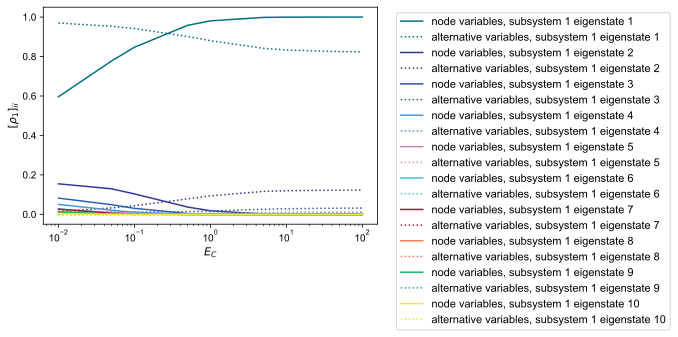

In [243]:
# plot participation of each subsystem eigenstates
# for subsystem 1, looking for the first 10 states
eigenstate = 0
for state_id in range(10):
    plt.semilogx(EC_values, [ptrace_diagonal_node_subsystem_1[EC_id][eigenstate][state_id] for EC_id in range(len(EC_values))], linestyle="-", color = color_cycle[state_id], label="node variables, subsystem 1 eigenstate "+str(state_id+1))
    plt.semilogx(EC_values, [ptrace_diagonal_alternative_subsystem_1[EC_id][eigenstate][state_id] for EC_id in range(len(EC_values))], linestyle=":", color = color_cycle[state_id], label="alternative variables, subsystem 1 eigenstate "+str(state_id+1))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel(r"$E_C$")
plt.ylabel(r"$[\rho_1]_{ii}$")